In [1]:
import os
import numpy as np
import tensorflow as tf
import random
import pathlib
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML 

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "14"
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)
display(HTML("<style>.container { width:98% !important; }</style>")) 

In [3]:
tf.random.uniform([2], minval=224, maxval=288, dtype=tf.int32)

<tf.Tensor: id=3, shape=(2,), dtype=int32, numpy=array([278, 251], dtype=int32)>

In [4]:
def augmentation(img):
    
    img = tf.image.resize(img, [tf.random.uniform([], minval=224, maxval=288, dtype=tf.int32), tf.random.uniform([], minval=224, maxval=288, dtype=tf.int32)])
    img = tf.image.random_crop(img ,[224, 224, 3])
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_flip_up_down(img)
    img = tfa.image.rotate(img, tf.random.uniform([], -45, 45))

    return img

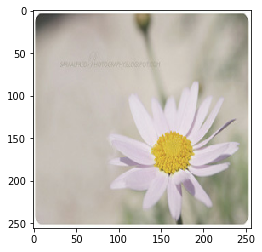

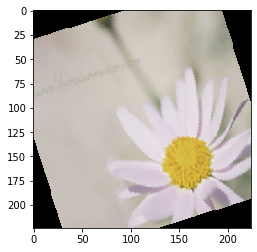

In [5]:
img = tf.io.read_file("flower_photos/daisy/3410906335_37e8a24b1c_n.jpg")
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, [256, 256])
plt.imshow(tf.cast(img, tf.uint8).numpy())

img = augmentation(img)
plt.figure()
plt.imshow(tf.cast(img, tf.uint8).numpy())